In [1]:
import message_ix
import ixmp
import matplotlib.pyplot as plt
mp = ixmp.Platform("ixmp_dev")

<IPython.core.display.Javascript object>

In [10]:
# insert model and scenario names here
models = ["ENGAGE_SSP2_v4.1.8.3.1_T4.5_r3.1", 
          #"MESSAGEix-MAgPIE_Forest-test", 
          #"MESSAGEix-MAgPIE_Forest-test", 
          #"MESSAGEix-MAgPIE_Forest-test"
          ]
scenarios = ["EN_NPi2020_1000f", 
             #"primary_constraint_1000f",  
             #"primary_constraint_1000f_landScenLo_002", 
             #"forest_split-primary_constraint_1000f"
             ]


In [2]:
#models = ["MESSAGEix-MAgPIE_Forest-test"]#, "MESSAGEix-MAgPIE_Forest-test"]
#scenarios = ["forest_split-primary_constraint_1000f"]#"forest_split-primary_constraint_1000f_landScenLo_0.02", "forest_split-primary_constraint_1000f_landScenLo_0.03"]
#models = ["MESSAGEix-GLOBIOM 1.1-R12-MAGPIE-MP00BD1BI00"]
#scenarios = ["EN_NPi2020_1000f"]
models = ["MESSAGEix-GLOBIOM 1.1-R12-MAGPIE-MP00BD1BI00"#, "MESSAGEix-GLOBIOM 1.1-R12-MAGPIE-MP00BD1BI00", 
          #"MESSAGEix-GLOBIOM 1.1-R12-MAGPIE"
          ]
scenarios = [#"new-mapping_no-smoothing_1000f", "new-mapping_with-smoothing_1000f", 
             "new-mapping_with-smoothing_primary-forest-constraint_tax_100", 
    #"1000f_MP00BD1BI00",
]
models = ["MESSAGEix-GLOBIOM 1.1-R12-MAGPIE-MP00BD1BI00"]
scenarios = ["cumu_cost_test_step5_1000f"]

In [3]:
def get_globiom_prices(scen):
    df_land = scen.par("land_output", filters={"commodity":"Price|Carbon|CO2"})
    df_land = df_land.drop(["level", "time", "commodity", "unit"], axis=1)
    return df_land.set_index(["node", "land_scenario", "year"])

In [4]:
def get_globiom_mix(scen):
    df_land = scen.var("LAND")
    return df_land[df_land["lvl"]!=0].drop("mrg", axis=1).set_index(["node", "land_scenario", "year"])

In [5]:
def calc_prices(scen):
    df_prc = get_globiom_prices(scen)
    df_mix = get_globiom_mix(scen)
    df_prc = df_mix.join(df_prc)
    df_prc["cost"] = df_prc["lvl"] * df_prc["value"]
    df_prc_sum = df_prc.groupby(["node", "year"]).sum()
    return df_prc_sum

In [6]:
def plot_globiom_prices(df_glob, df_msg, ax):
    legend = []
    for reg in df_glob.index.get_level_values(0).unique():
        df_glob.loc[reg].plot(y="cost", ax=ax)
        legend.append(reg)
    ax.set_xticks([i for i in range(2020,2111, 10)])

    df_msg["lvl"] = df_msg["lvl"] / 3.310036812
    df_msg.plot(x="year", y="lvl", ax= ax, linestyle="--", color="black", legend=False)
    legend.append("PRICE_EMISSION")
    ax.legend(legend)

MESSAGEix-GLOBIOM 1.1-R12-MAGPIE-MP00BD1BI00 cumu_cost_test_step5_1000f


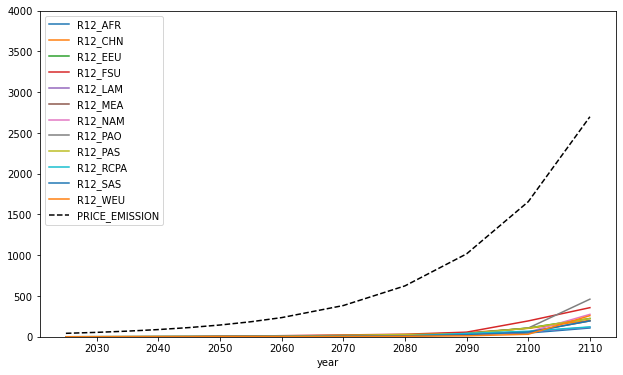

In [7]:
for m,s in zip(models, scenarios):
    print(m, s)
    scen = message_ix.Scenario(mp, m, s)
    df_glob = calc_prices(scen)
    df_tce_price = scen.var("PRICE_EMISSION")
    fig, ax = plt.subplots(figsize=(10.33, 6))
    plot_globiom_prices(df_glob, df_tce_price, ax)
    ax.set_ylim((0,4000))
    del scen
    #ax.set_title(f"{m} - {s}")

In [12]:
fig.savefig("carbon_prices_plot_globiom.svg")

In [10]:
scen.has_solution()

False

In [5]:
import gdxpds
import matplotlib.pyplot as plt

In [1]:
#file = "MsgOutput_MESSAGEix-GLOBIOM_1.1-R12-MAGPIE-MP00BD1BI00_new-mapping_with-smoothing_1000f"
#file = "MsgOutput_MESSAGEix-MAgPIE_Forest-test_primary_constraint_1000f_landScenLo_002"
file = "MsgOutput_MESSAGEix-GLOBIOM_1.1-R12-MAGPIE-MP00BD1BI00_new-mapping_with-smoothing_primary-forest-constraint_tax_1000"
#file = "MsgOutput_MESSAGEix-GLOBIOM_1.1-R12-MAGPIE-MP00BD1BI00_new-mapping_with-smoothing_primary-forest-constraint_1000f"
file = "MsgOutput_MESSAGEix-GLOBIOM_1.1-R12-MAGPIE-MP00BD1BI00_cumu_cost_test_step7_1000f"

In [2]:
dir = "C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output/"
dir = "C:/Users\maczek\Downloads/"

In [6]:
df_cum = gdxpds.to_dataframe(f"{dir}{file}.gdx", "EMISS_LU")["EMISS_LU"]

In [7]:
df_cum = df_cum[df_cum["emission"]=="LU_CO2"]

In [8]:
df_cum = df_cum[df_cum.columns[:-4]]

In [9]:
df_cum = df_cum[(df_cum["type_tec"]=="all") & (df_cum["node"]!="World")]

In [10]:
# df_emi = gdxpds.to_dataframe("C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output/MsgOutput_MESSAGEix-GLOBIOM_1.1-R12-MAGPIE-MP00BD1BI00_new-mapping_with-smoothing_1000f.gdx", "land_emission")["land_emission"]
# df_land = gdxpds.to_dataframe("C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output/MsgOutput_MESSAGEix-GLOBIOM_1.1-R12-MAGPIE-MP00BD1BI00_new-mapping_with-smoothing_1000f.gdx", "LAND")["LAND"]
df_emi = gdxpds.to_dataframe(f"{dir}{file}.gdx", "land_emission")["land_emission"]
df_land = gdxpds.to_dataframe(f"{dir}{file}.gdx", "LAND")["LAND"]

In [11]:
df_emi = df_emi[df_emi["emission"] == "LU_CO2"]
df_emi = df_emi.drop("emission", axis=1)

In [12]:
df_land = df_land[df_land.columns[:-4]]
df_land = df_land[df_land["Level"]!=0]
df_land = df_land.set_index(["node", "year_all", "land_scenario"])

In [13]:
df_emi = df_emi.set_index(["node", "year_all", "land_scenario"])

In [14]:
df_join = df_land.join(df_emi)

BIO00GHG200 234.0
BIO00GHG400 210.0
BIO15GHG600 203.0
mix:  234.0


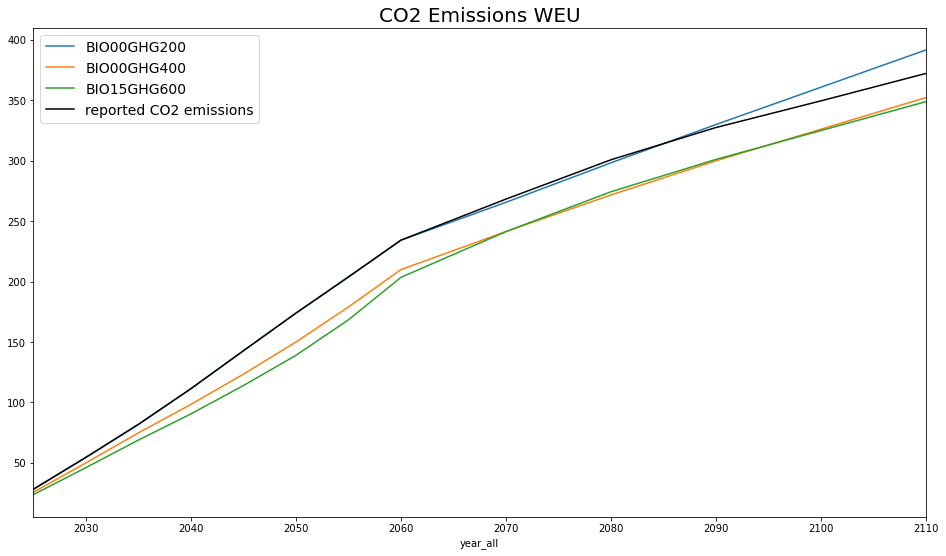

In [140]:
fig, ax = plt.subplots(figsize=(16,9))
df_plot = df_emi.loc["R12_WEU"]
legend=[]
for i in df_plot.index.get_level_values(1).unique():
    #print(i)
    if i in ["BIO15GHG600", "BIO00GHG400", "BIO00GHG200"]:
        df_plot.index = df_plot.index.set_levels(df_plot.index.levels[0].astype(int), level=0)
        df_scen = df_plot.swaplevel(0,1).loc[i]
        df_scen.cumsum().plot(ax=ax)
        print(i, df_scen.loc[:2060].sum()[0].round())
        legend.append(i)
ax.set_xlim((2025,2110))

df_mix = df_join.loc["R12_WEU"]
df_mix.index = df_mix.index.astype(int)
df_mix.cumsum().plot(ax=ax, legend=False, y="value", color="black")
print("mix: ", df_mix.loc[:2060, "value"].sum().round())
legend.append("reported CO2 emissions")

ax.legend(legend, fontsize=14)
ax.set_title("CO2 Emissions WEU", fontsize=20)
fig.savefig("CO2_Emissions_WEU_cum.svg")

BIO00GHG200 234.0
BIO00GHG400 210.0
BIO00GHG990 156.0
BIO15GHG600 203.0
BIO15GHG990 181.0
mix:  234.0


Text(0.5, 1.0, 'CO2 Emissions WEU')

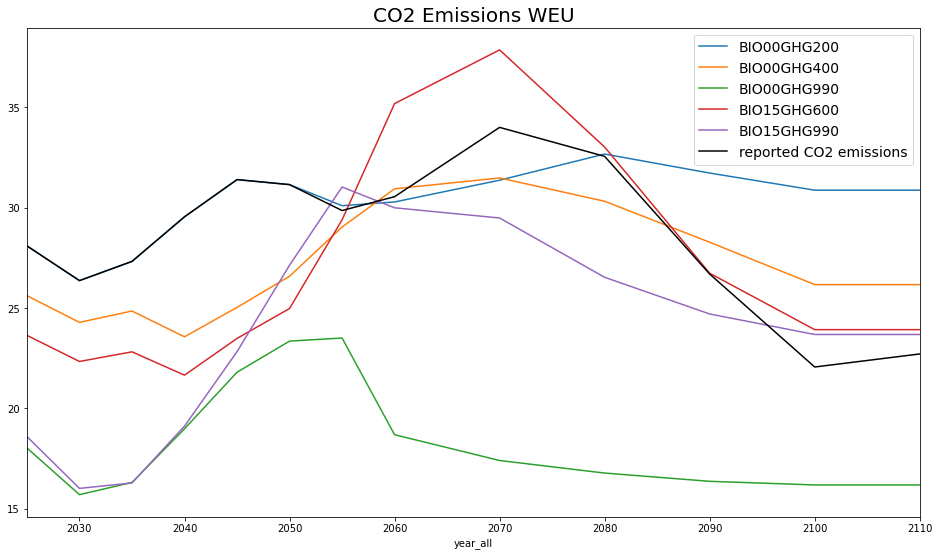

In [129]:
fig, ax = plt.subplots(figsize=(16,9))
df_plot = df_emi.loc["R12_WEU"]
legend=[]
for i in df_plot.index.get_level_values(1).unique():
    #print(i)
    if i in ["BIO15GHG600", "BIO00GHG400", "BIO00GHG200", "BIO15GHG990", "BIO00GHG990"]:
        df_plot.index = df_plot.index.set_levels(df_plot.index.levels[0].astype(int), level=0)
        df_scen = df_plot.swaplevel(0,1).loc[i]
        df_scen.plot(ax=ax)
        print(i, df_scen.loc[:2060].sum()[0].round())
        legend.append(i)
ax.set_xlim((2025,2110))

df_mix = df_join.loc["R12_WEU"]
df_mix.index = df_mix.index.astype(int)
df_mix.plot(ax=ax, legend=False, y="value", color="black")
print("mix: ", df_mix.loc[:2060, "value"].sum().round())
legend.append("reported CO2 emissions")

ax.legend(legend, fontsize=14)
ax.set_title("CO2 Emissions WEU", fontsize=20)

BIO00GHG200 234.0
BIO00GHG400 210.0
BIO15GHG600 203.0
mix:  234.0


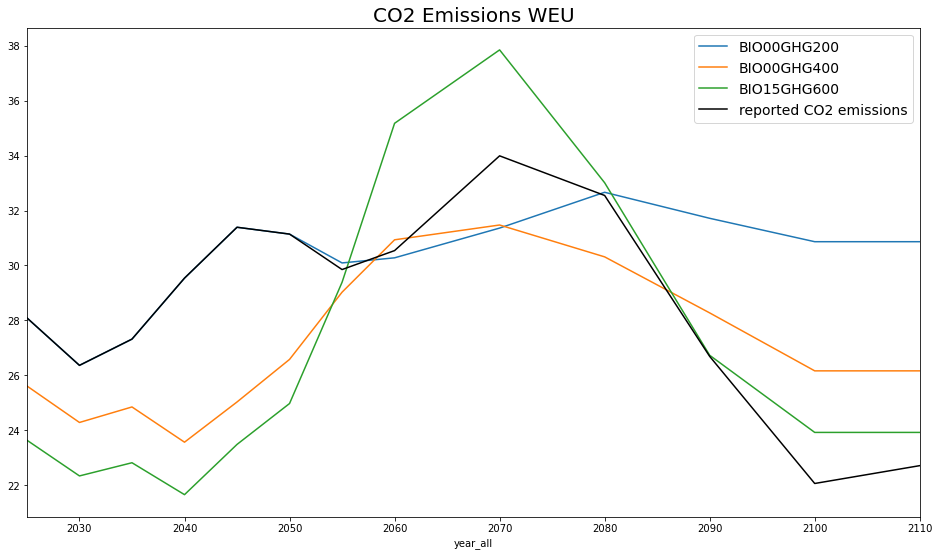

In [138]:
fig, ax = plt.subplots(figsize=(16,9))
df_plot = df_emi.loc["R12_WEU"]
legend=[]
for i in df_plot.index.get_level_values(1).unique():
    #print(i)
    if i in ["BIO15GHG600", "BIO00GHG400", "BIO00GHG200"]:
        df_plot.index = df_plot.index.set_levels(df_plot.index.levels[0].astype(int), level=0)
        df_scen = df_plot.swaplevel(0,1).loc[i]
        df_scen.plot(ax=ax)
        print(i, df_scen.loc[:2060].sum()[0].round())
        legend.append(i)
ax.set_xlim((2025,2110))

df_mix = df_join.loc["R12_WEU"]
df_mix.index = df_mix.index.astype(int)
df_mix.plot(ax=ax, legend=False, y="value", color="black")
print("mix: ", df_mix.loc[:2060, "value"].sum().round())
legend.append("reported CO2 emissions")

ax.legend(legend, fontsize=14)
ax.set_title("CO2 Emissions WEU", fontsize=20)
fig.savefig("CO2_Emissions_WEU.svg")

In [99]:
df_emi = df_emi[~df_emi.index.get_level_values(1).isin(["2000", "2005", "2010", "2015", "2020"])]
df_emi

Value
node    year_all land_scenario         
R12_AFR 2025     BIO05GHG000    313.340
        2030     BIO05GHG000    405.057
        2035     BIO05GHG000    467.444
        2040     BIO05GHG000    466.584
        2045     BIO05GHG000    438.874
...                                 ...
R12_CHN 2070     BIO45GHG990     31.567
        2080     BIO45GHG990     19.381
        2090     BIO45GHG990      5.939
        2100     BIO45GHG990     -3.808
        2110     BIO45GHG990     -3.808

[13104 rows x 1 columns]

In [15]:
df_join["value"] = df_join["Value"] * df_join["Level"]

In [16]:
df_join = df_join.groupby(["node", "year_all"]).sum()

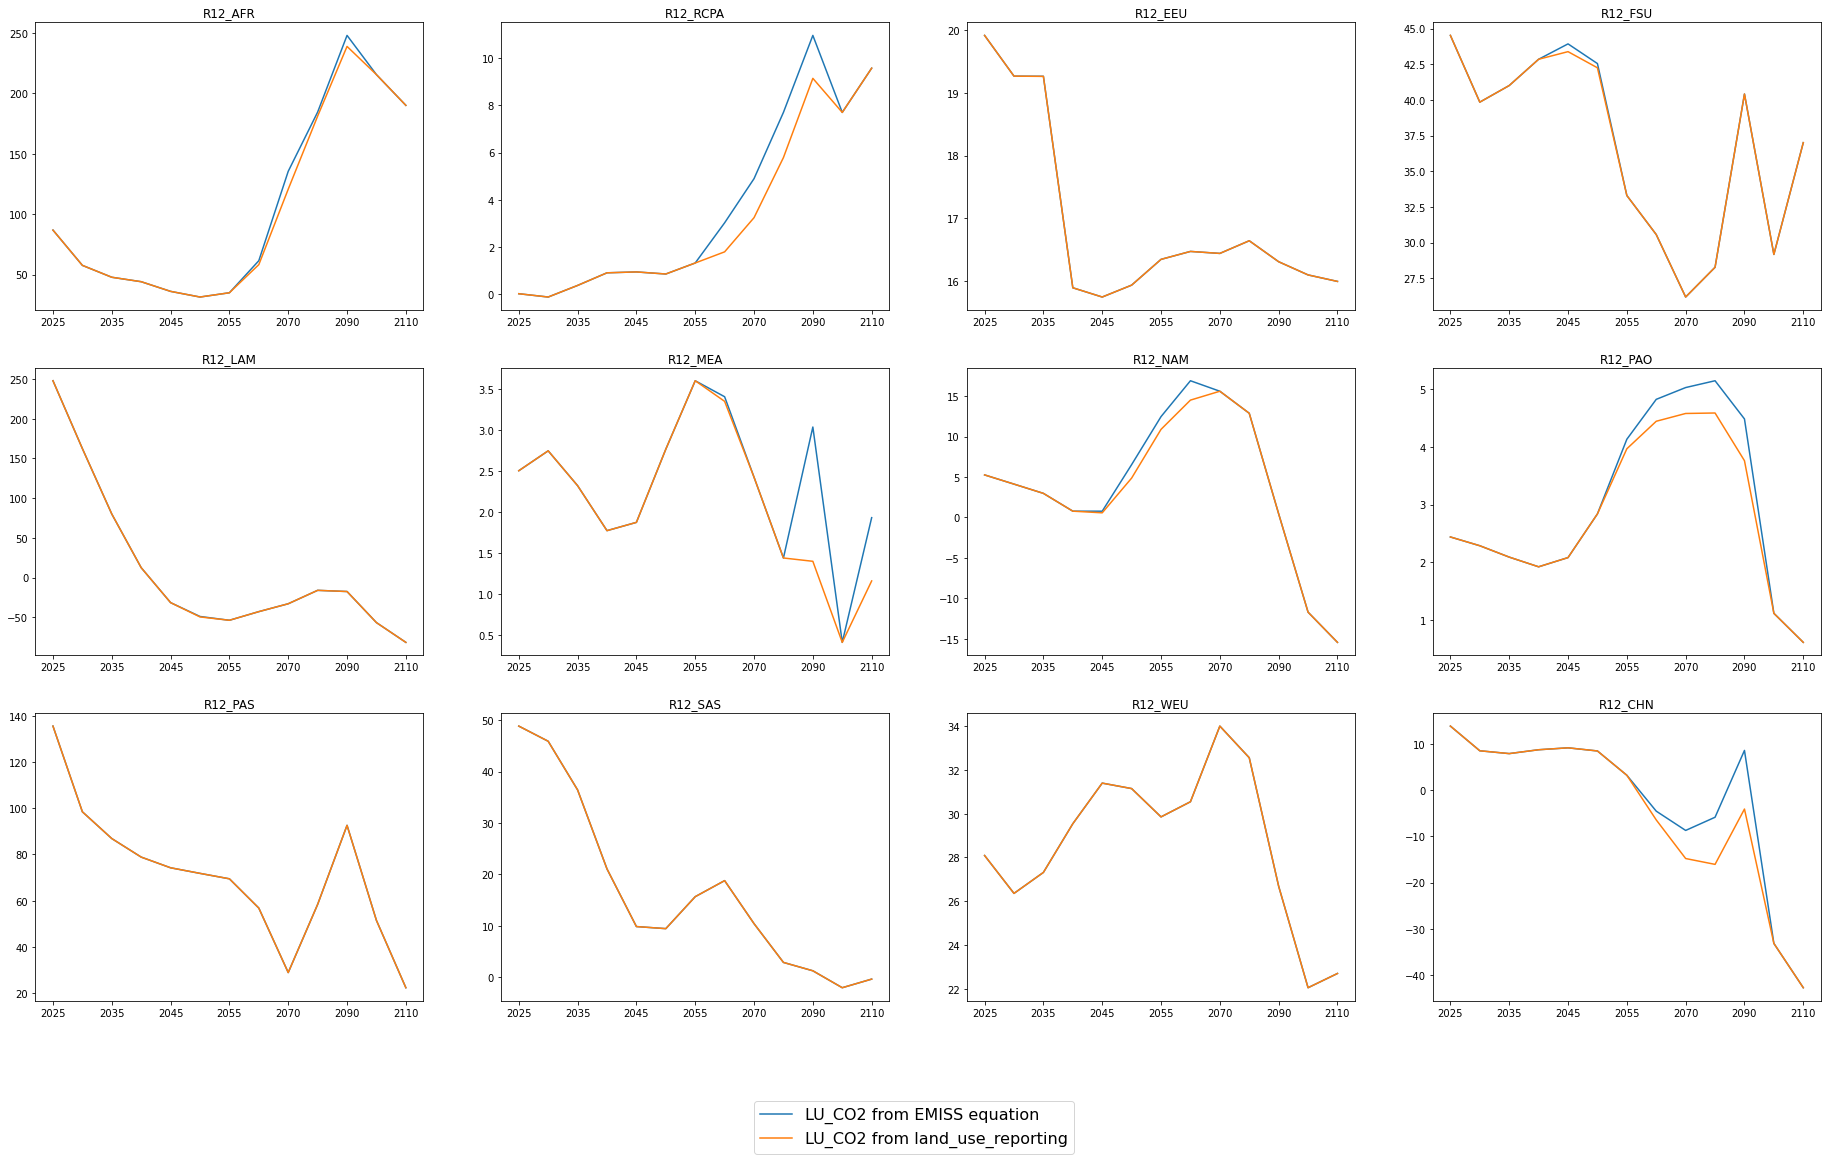

In [17]:
fig, ax = plt.subplots(3,4, figsize=(32,18))
ax_it = iter(fig.axes)
for reg in df_cum.node.unique():
    if reg == "R12_GLB":
        continue    
    ax = next(ax_it)
    df_tmp = df_cum[df_cum["node"]==reg]
    df_tmp.plot(x="year_all", y="Level", ax=ax, legend=False)
    df_tmp2 = df_join.loc[reg]
    df_tmp2.plot(ax=ax, y="value", legend=False)
    ax.set_title(reg)
    ax.set_xlabel("")
fig.legend(["LU_CO2 from EMISS equation", "LU_CO2 from land_use_reporting"], fontsize=16, loc="lower center")

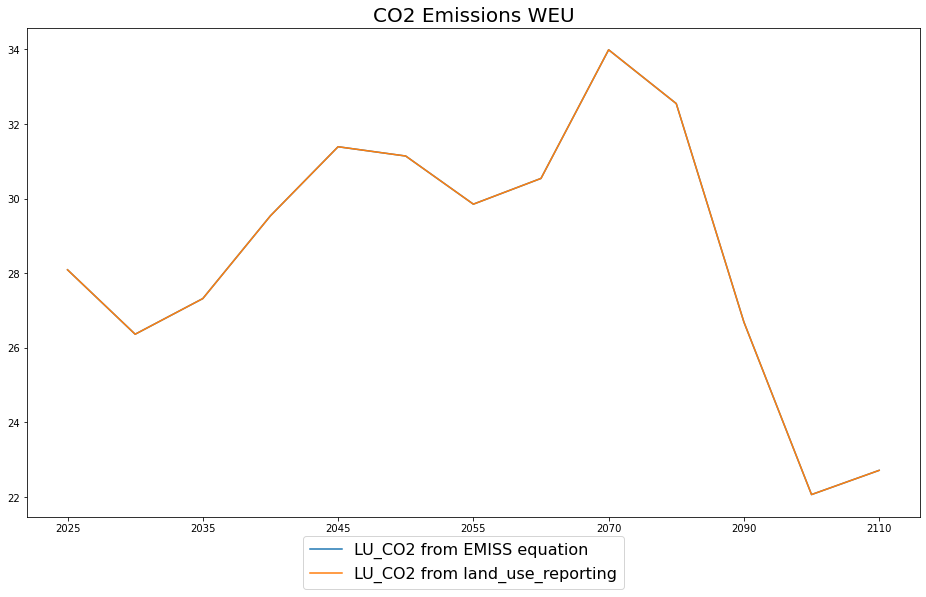

In [139]:
fig, ax = plt.subplots(figsize=(16,9))
ax_it = iter(fig.axes)
for reg in df_cum.node.unique():
    if reg != "R12_WEU":
        continue    
    ax = next(ax_it)
    df_tmp = df_cum[df_cum["node"]==reg]
    df_tmp.plot(x="year_all", y="Level", ax=ax, legend=False)
    df_tmp2 = df_join.loc[reg]
    df_tmp2.plot(ax=ax, y="value", legend=False)
    ax.set_title("CO2 Emissions WEU", fontsize=20)
    ax.set_xlabel("")
fig.legend(["LU_CO2 from EMISS equation", "LU_CO2 from land_use_reporting"], fontsize=16, loc="lower center")
fig.savefig("CO2_Emissions_WEU_diff.svg")

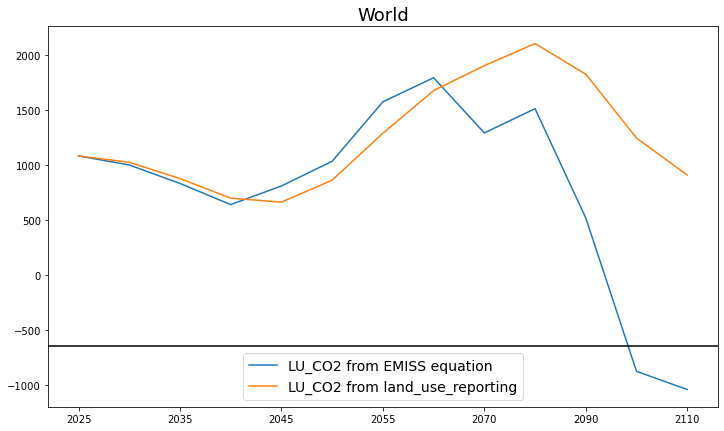

In [23]:
fig, ax = plt.subplots(figsize=(12,7))
df_cum.groupby("year_all").sum().plot(ax=ax, legend=False)
df_join.groupby("year_all").sum().plot(y="value", ax=ax, legend=False)
ax.set_xlabel("")
#ax.set_ylim((-2000, 1500))
ax.set_title("World", fontsize=18)
ax.legend(["LU_CO2 from EMISS equation", "LU_CO2 from land_use_reporting"], fontsize=14, loc="lower center")
ax.axhline(-650, color="black")

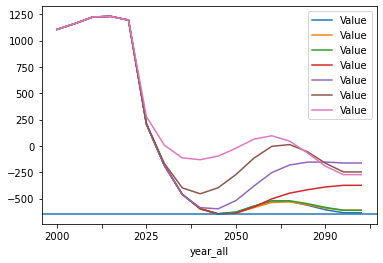

In [30]:
fig, ax = plt.subplots()
for i in df_emi.index.get_level_values(2).unique():
    if "4000" not in i:
        continue
    df_emi.swaplevel(0,2).loc[i].groupby("year_all").sum().plot(ax=ax)
ax.axhline(-650)

In [16]:
fig.savefig("emi_accounting_comparison_tax_1000.svg")

In [48]:
df_join[df_join.index.get_level_values(1)<2055]

TypeError: '<' not supported between instances of 'str' and 'int'

In [64]:
df_cum.groupby("node").sum()

,Level
node,
R12_AFR,1360.246539
R12_CHN,-234.583538
R12_EEU,94.750907
R12_FSU,-36.503831
R12_GLB,0.000000
R12_LAM,-461.315355
R12_MEA,43.783812
R12_NAM,-191.983143
R12_PAO,-43.486300


In [17]:
df_land2 = df_land.reset_index()
histo = df_land2.join(df_land2["land_scenario"].str.split("GHG", expand=True)).drop("land_scenario", axis=1).groupby(1).sum()

In [18]:
histo.index = histo.index.astype(int)#.astype(int)#.plot.bar()

Text(0.5, 0, 'GHG category')

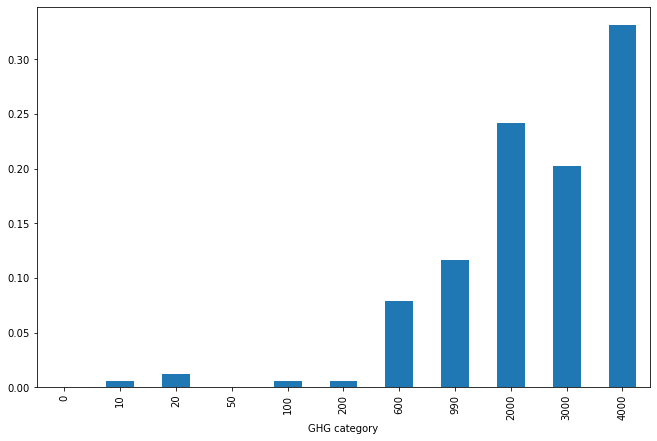

In [19]:
fig, ax = plt.subplots(figsize=(11,7))
(histo/168).sort_index().plot.bar(ax=ax, legend=False)
ax.set_xlabel("GHG category")

In [20]:
fig.savefig("histo_tax_1000.svg")

In [28]:
df_land

Level
node    year_all land_scenario          
R12_AFR 2020     BIO05GHG200    1.000000
        2100     BIO00GHG000    0.001690
        2110     BIO00GHG000    0.002765
        2040     BIO00GHG100    0.226219
        2045     BIO00GHG100    0.401263
...                                  ...
R12_CHN 2020     BIO07GHG100    1.000000
        2080     BIO07GHG3000   0.401263
        2090     BIO07GHG3000   0.240251
        2100     BIO07GHG3000   0.143847
        2110     BIO07GHG3000   0.086127

[314 rows x 1 columns]